In [1]:
import argparse
import os
#from dataset import get_loader
from solver import Solver
import glob
from torchvision import transforms, utils
import torchvision.transforms as standard_transforms

from torch.utils.data import Dataset, DataLoader
from own_dataloader import Rescale
from own_dataloader import RescaleT
from own_dataloader import RandomCrop
from own_dataloader import CenterCrop
from own_dataloader import ToTensor
from own_dataloader import ToTensorLab
from own_dataloader import SalObjDataset

In [2]:
data_dir =   'C:/Users/Paul Vincent Nonat/Documents/Graduate Student Files/Saliency_Dataset2/dataset_test/DUTOMRON/'

test_image_dir = 'image/'
test_label_dir = 'gt/'
enableInpaintAug = False
batch_size_train=32
batch_size_val=1
image_ext = '.jpg'
label_ext = '.png'

In [3]:
def main(config):

    test_img_name_list = glob.glob(data_dir + test_image_dir + '*' + image_ext)
    print("data_dir + test_image_dir + '*' + image_ext: ", data_dir + test_image_dir + '*' + image_ext)

    test_lbl_name_list = []
    for img_path in test_img_name_list:
    	img_name = img_path.split("\\")[-1]
    	aaa = img_name.split(".")
    	bbb = aaa[0:-1]
    	imidx = bbb[0]
    	for i in range(1,len(bbb)):
    		imidx = imidx + "." + bbb[i]
    	test_lbl_name_list.append(data_dir + test_label_dir + imidx + label_ext)

    print("---")
    print("test images: ", len(test_img_name_list))
    print("test labels: ", len(test_lbl_name_list))
    print("---")

    test_num = len(test_img_name_list)

    salobj_dataset_test = SalObjDataset(
        img_name_list=test_img_name_list,
        lbl_name_list=test_lbl_name_list,
        transform=transforms.Compose([
            RescaleT(256),
            RandomCrop(224),
            ToTensorLab(flag=0)]),
    		category="test",
    		enableInpaintAug=enableInpaintAug)
            

    test_loader = DataLoader(salobj_dataset_test, batch_size=batch_size_val, shuffle=True, num_workers=1)
    if not os.path.exists(config.test_fold): os.mkdir(config.test_fold)
    test = Solver(None, None, test_loader, config)
    test.test(100, use_crf=config.use_crf)

data_dir + test_image_dir + '*' + image_ext:  C:/Users/Paul Vincent Nonat/Documents/Graduate Student Files/Saliency_Dataset2/dataset_test/DUTOMRON/image/*.jpg
---
test images:  5166
test labels:  5166
---
DSS
DSS(
  (base): ModuleList(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1

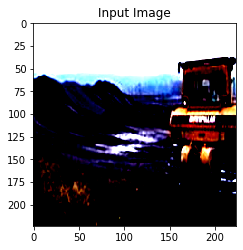

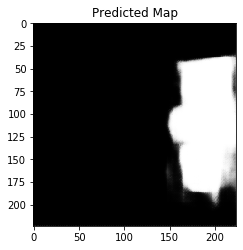

100
[0] mae: 0.0434
torch.Size([1, 224, 224])
torch.Size([224, 224])


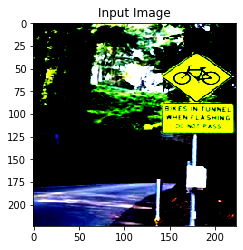

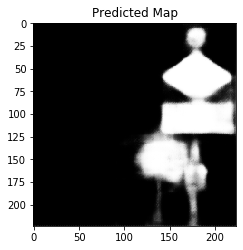

100
[1] mae: 0.0853
torch.Size([1, 224, 224])
torch.Size([224, 224])


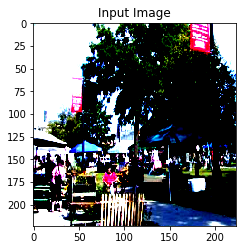

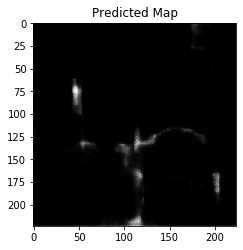

100
[2] mae: 0.0275
torch.Size([1, 224, 224])
torch.Size([224, 224])


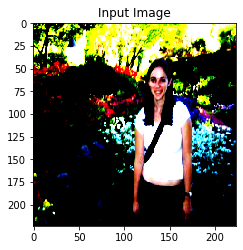

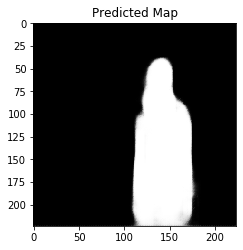

100
[3] mae: 0.0101
torch.Size([1, 224, 224])
torch.Size([224, 224])


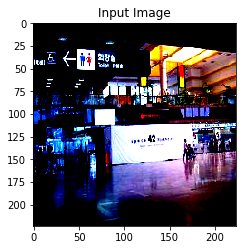

KeyboardInterrupt: 

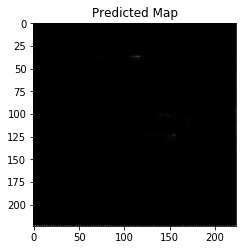

In [4]:
if __name__ == '__main__':
    data_root = os.path.join(os.path.expanduser('~'), 'data')
    vgg_path = './weights/vgg16_feat.pth'


    parser = argparse.ArgumentParser()

    # Hyper-parameters
    parser.add_argument('--n_color', type=int, default=3)
    parser.add_argument('--img_size', type=int, default=256)  # 256
    parser.add_argument('--lr', type=float, default=1e-6)
    parser.add_argument('--clip_gradient', type=float, default=1.0)
    parser.add_argument('--cuda', type=bool, default=False)

    # Training settings
    parser.add_argument('--vgg', type=str, default=vgg_path)
    parser.add_argument('--epoch', type=int, default=500)
    parser.add_argument('--val', type=bool, default=True)

    parser.add_argument('--num_thread', type=int, default=4)
    parser.add_argument('--load', type=str, default='')
    parser.add_argument('--save_fold', type=str, default='./results')
    parser.add_argument('--epoch_val', type=int, default=10)
    parser.add_argument('--batch_size', type=int, default=batch_size_train)
    parser.add_argument('--batch_size_val', type=int, default=batch_size_val)
    parser.add_argument('--epoch_save', type=int, default=10)
    parser.add_argument('--epoch_show', type=int, default=1)
    parser.add_argument('--pre_trained', type=str, default=None)

    # Testing settings
    parser.add_argument('--model', type=str, default='./weights/final.pth')
    parser.add_argument('--test_fold', type=str, default='./results/test')
    parser.add_argument('--use_crf', type=bool, default=False)

    # Misc
    parser.add_argument('--mode', type=str, default='train', choices=['train', 'test'])
    parser.add_argument('--visdom', type=bool, default=False)
    
    import easydict
    
    config =  easydict.EasyDict({
    
    "n_color": 3,
    "img_size":256,
    "lr":1e-6,
    "clip_gradient":1.0,
    "cuda":False,

    "vgg":vgg_path,
    "epoch":500,
    "val":True,
        
    "num_thread":4,
    "load":'',
    "save_fold":'./results',
    "epoch_val":10,
    "batch_size":batch_size_train,
    "batch_size_val":batch_size_val,
    "epoch_save":10,
    "epoch_show":1,
    "pre_trained":None,

    "model":'./weights/experiment1.pth',
    "test_fold":'./results/test',
    "use_crf":False,

    "mode":'test',
    "visdom":False,
})
    if not os.path.exists(config.save_fold): os.mkdir(config.save_fold)
    main(config)
    
    